## Importing libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading the dataset 

In [6]:
data = pd.read_csv('train.csv')

In [25]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Cleaning the dataset 

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [9]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [10]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [11]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Exploratory Data Analysis (EDA) 

In [13]:
survival_rate = data['Survived'].value_counts(normalize=True) * 100
survival_rate

0    61.616162
1    38.383838
Name: Survived, dtype: float64

##### We conclude that more than 60% passengers died when the ship sank. 

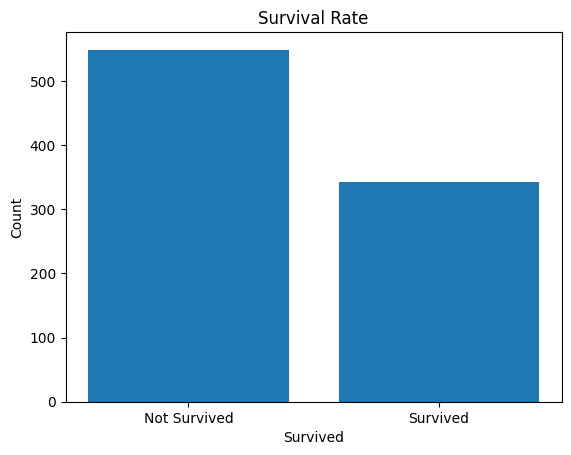

In [14]:
plt.bar(['Not Survived', 'Survived'], data['Survived'].value_counts())
plt.ylabel('Count')
plt.title('Survival Rate')
plt.show()

In [15]:
pclass_survived = data.groupby('Pclass')['Survived'].mean() * 100
pclass_survived

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

##### We conclude that more than 62% of passengers from the first class survived. This comes to show that passengers from the first class were given special treatment.

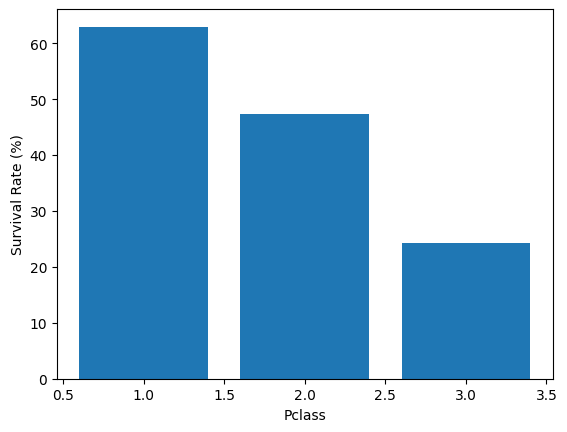

In [18]:
plt.bar(pclass_survived.index, pclass_survived.values)
plt.xlabel('Pclass')
plt.ylabel('Survival Rate (%)')
plt.show()

In [22]:
gender_survived = data.groupby('Sex')['Survived'].mean() * 100
gender_survived

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

##### From the passengers that were saved, around a quarter were female meaning they were saved first.

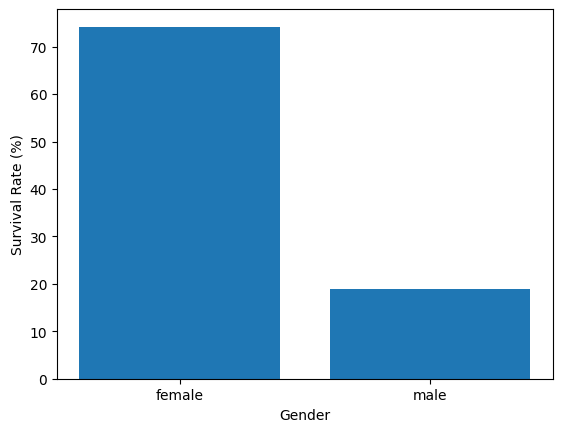

In [23]:
plt.bar(gender_survived.index, gender_survived.values)
plt.xlabel('Gender')
plt.ylabel('Survival Rate (%)')
plt.show()

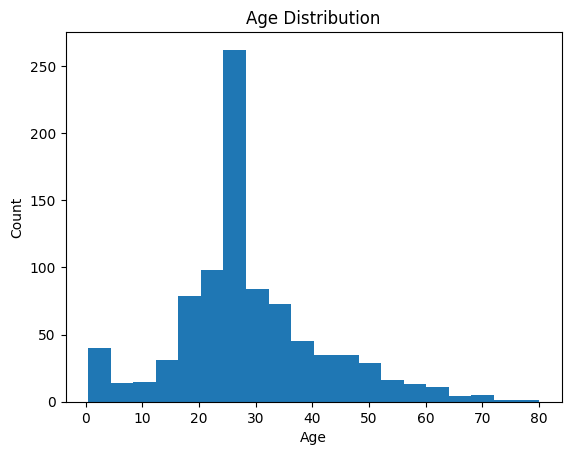

In [24]:
plt.hist(data['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

##### Most of the passengers were of the ages between 20 and 30.